In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymc as pm
import aesara
import aesara.tensor as at

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
weather_prob = np.asarray([.2, .8])  # Sunny, Not sunny
greeting_prob = np.asarray([[.6, .4, 0.],
                            [.2, 0., .8]])

In [3]:
with pm.Model() as m:
    observed = pm.Data('observed', 0, mutable=True)
    weather = pm.Categorical('weather', weather_prob)
    greeting = pm.Categorical('greeting', 
                              aesara.shared(greeting_prob)[weather], 
                              observed=observed)
    prior_sample = pm.sample_prior_predictive(1000)

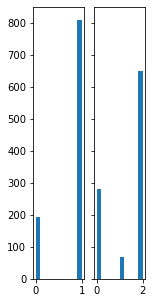

In [4]:
_, axes = plt.subplots(1, 2, figsize=(2, 5), sharey=True)
axes[0].hist(prior_sample.prior['weather'].squeeze());
axes[1].hist(prior_sample.prior_predictive['greeting'].squeeze());

In [5]:
traces = []
for obs in range(3):
    with m:
        observed.set_value(obs)
        traces.append(pm.sample(initvals={'weather': max(0, obs-1)}))

Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [weather]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
/opt/miniconda3/envs/aesara-dev/lib/python3.9/site-packages/numba/core/dispatcher.py:241: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()
Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [weather]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
/opt/miniconda3/envs/aesara-dev/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [weather]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
/opt/miniconda3/envs/aesara-dev/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


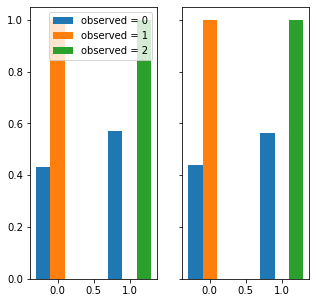

In [6]:
_, axes = plt.subplots(1, 2, figsize=(5, 5), sharey=True)
for i, trace in enumerate(traces):
    x, y = np.unique(trace.posterior['weather'], return_counts=True)
    axes[0].bar(x + (i-1) / 5, y/y.sum(), width=.2);
    x_, y_ = np.unique(
        prior_sample.prior['weather'].values[prior_sample.prior_predictive['greeting'].values == i],
        return_counts=True)
    axes[1].bar(x_ + (i-1) / 5, y_/y_.sum(), width=.2);
axes[0].legend([f'observed = {i}' for i in range(3)])